# Filling in the KMeans classifier and test it

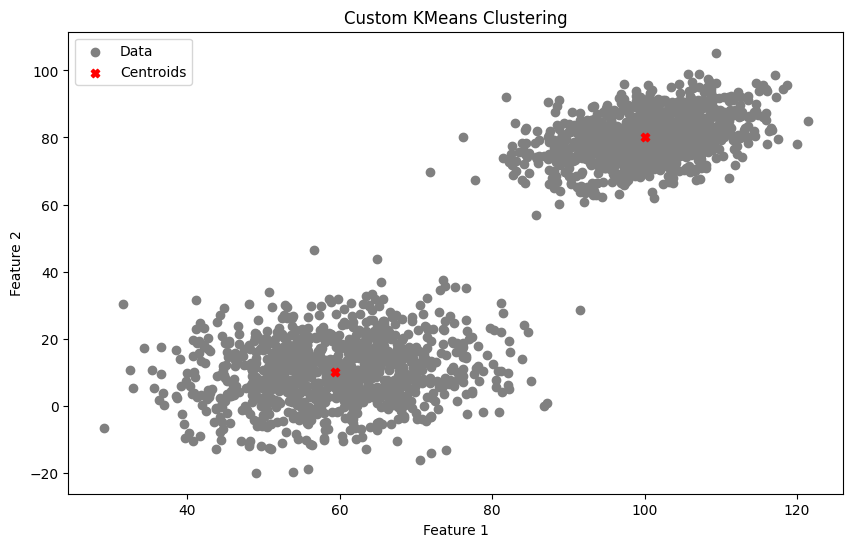

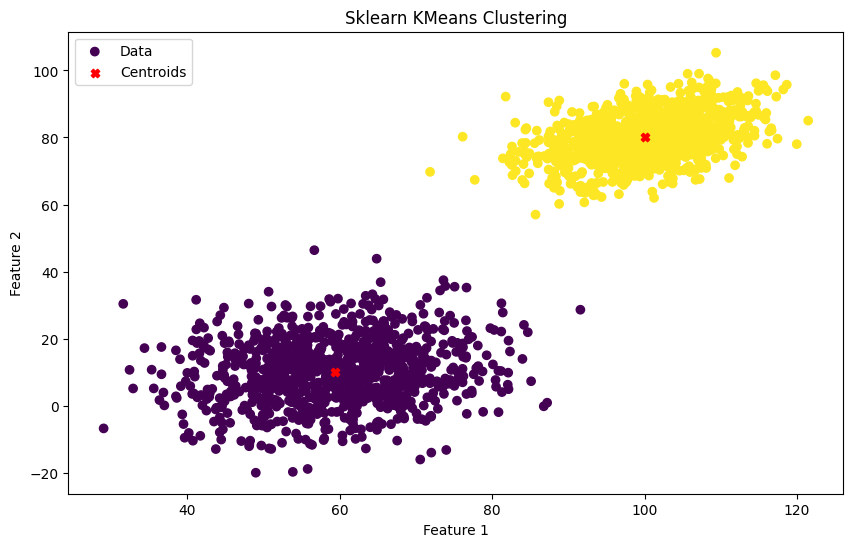

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans as KM
from classifiers import KMeans

np.random.seed(42)
muRest = [60, 10]
sigmaRest = [[100, 20], [20, 100]]
muStress = [100, 80]
stressSigma = [[50, 20], [20, 50]]

dataRest = np.random.multivariate_normal(muRest, sigmaRest, 1000)
dataStress = np.random.multivariate_normal(muStress, stressSigma, 1000)

data = np.vstack((dataRest, dataStress))

kmeans = KMeans()
kmeans.fit(data, k=2)

plt.figure(figsize=(10, 6))
plt.scatter(data[:, 0], data[:, 1], c='gray', label='Data')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red', marker='X', label='Centroids')
plt.title('Custom KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

skMeans = KM(n_clusters=2, random_state=42)
skMeans.fit(data)

plt.figure(figsize=(10, 6))
plt.scatter(data[:, 0], data[:, 1], c=skMeans.labels_, cmap='viridis', label='Data')
plt.scatter(skMeans.cluster_centers_[:, 0], skMeans.cluster_centers_[:, 1], c='red', marker='X', label='Centroids')
plt.title('Sklearn KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Filling in the PrincipleComponentAnalysis class

C:\Users\pooja\AppData\Local\Temp\ipykernel_35552\3280098070.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(features, labels=["sepal_length", "sepal_width", "petal_length", "petal_width"])


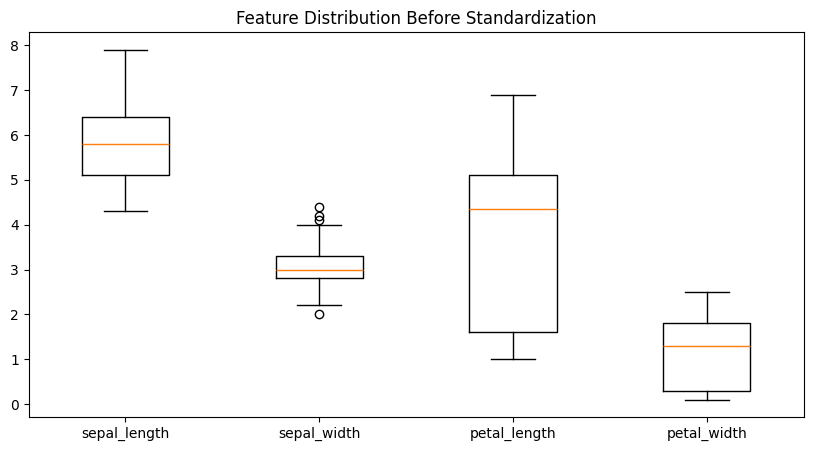

Custom PCA Projection Matrix:
 [[ 0.52237162  0.37231836]
 [-0.26335492  0.92555649]
 [ 0.58125401  0.02109478]
 [ 0.56561105  0.06541577]]


In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from feature_reduction import PrincipleComponentAnalysis
import pandas as pd 

irislink = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(irislink, header=None, names=["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])
df.dropna(inplace=True)
features = df.iloc[:, :-1].values

plt.figure(figsize=(10, 5))
plt.boxplot(features, labels=["sepal_length", "sepal_width", "petal_length", "petal_width"])
plt.title("Feature Distribution Before Standardization")
plt.show()

custpca = PrincipleComponentAnalysis()
custpca.fit(features, thresh=0.95)
print("Custom PCA Projection Matrix:\n", custpca.model_params['projectionMat'])

C:\Users\pooja\AppData\Local\Temp\ipykernel_35552\3627471401.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(features, labels=["sepal_length", "sepal_width", "petal_length", "petal_width"])


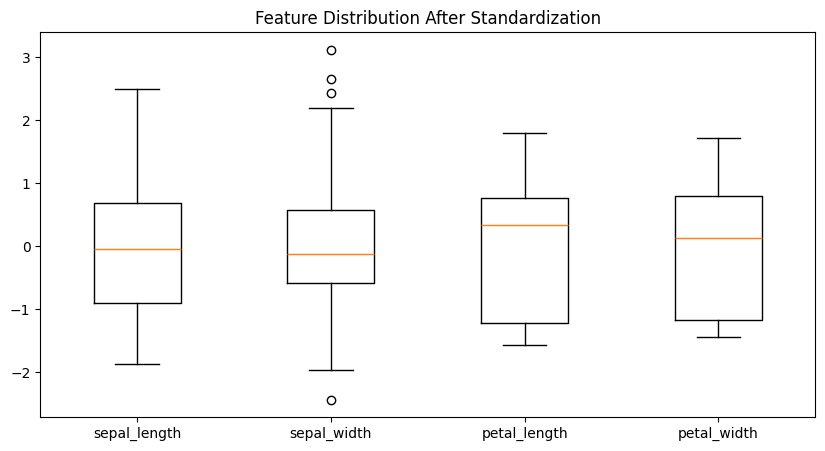


Sklearn PCA Projection Matrix:
 [[ 0.52237162  0.37231836]
 [-0.26335492  0.92555649]
 [ 0.58125401  0.02109478]
 [ 0.56561105  0.06541577]]


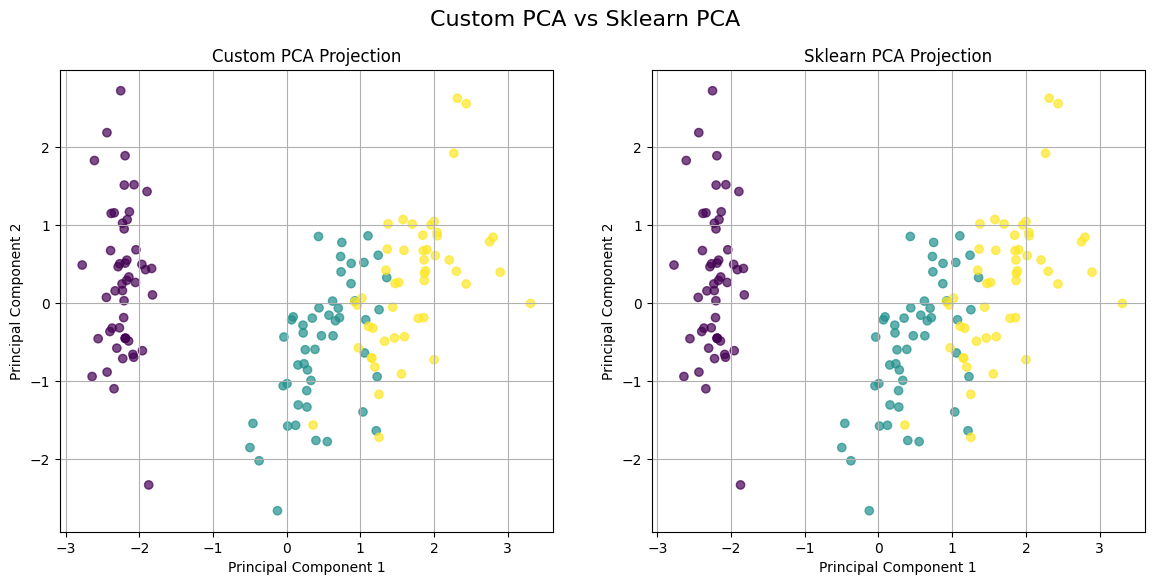

In [3]:
custdata = custpca.predict(features)

scaler = StandardScaler()
features = scaler.fit_transform(features)

plt.figure(figsize=(10, 5))
plt.boxplot(features, labels=["sepal_length", "sepal_width", "petal_length", "petal_width"])
plt.title("Feature Distribution After Standardization")
plt.show()

skpca = PCA(n_components=0.95)
skpca.fit(features)
print("\nSklearn PCA Projection Matrix:\n", skpca.components_.T)

skdata = skpca.transform(features)

species = df['species']

temp = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
colors = species.map(temp)

custdata = np.array(custdata)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(custdata[:, 0], custdata[:, 1], c=colors, cmap='viridis', alpha=0.7)
plt.title('Custom PCA Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(skdata[:, 0], skdata[:, 1], c=colors, cmap='viridis', alpha=0.7)
plt.title('Sklearn PCA Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)

plt.suptitle('Custom PCA vs Sklearn PCA', fontsize=16)
plt.show()

Standardizing the data before PCA is required because PCA is a variance-based technique. And if the features in the dataset have different scales, those with larger magnitude will dominate the principle components which leads to a biased result. So, by standardizing (which is $\frac{(data - mean)}{std}$) we make all the features contribute equally to the PCA. This is very important when dealing with different units or ranges as PCA doesn't account for these differences. If this isn't done then the principle components might capture the variations due to scale rather than structure.

Also, I have noticed that using standardization yields different results than Sklearn's PCA. Upon observing the graphs of both the test predictions, I found that the graph of my PCA looks opposite to Sklearn's (it looked like a flipped version of SKlearn's PCA). So there is a difference in the signs of the data point predictions. So I implemented a sign code that changes the signs to the correct ones. Another thing that I observed is that, upon standardizing the data, it gave different numbers (in the projection matrix) than what was in Sklearn's PCA (Components). Upon looking further into the function, I found that PCA in sklearn doesn't perform standardization but uses mean-centering (Which means it just centers data by subtracting mean). As sometimes the data is already standardized, there is no need to standardize it again by adding the standardization code in PCA. Instead, Sklearn has a StandardScalar function that standardizes data when needed as automatic scaling could be unnecessary or even detrimental in certain cases. So here I used StandardScalar function.

# Classifying a pokemon as a legendary or non-legendary using a Support Vector Machine from Sklearn.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            1045 non-null   object
 1   Name2           175 non-null    object
 2   Primary Type    1045 non-null   object
 3   Secondary type  553 non-null    object
 4   Attack          1045 non-null   int64 
 5   Defense         1045 non-null   int64 
 6   HP              1045 non-null   int64 
 7   Sp.Attack       1045 non-null   int64 
 8   Sp.Defense      1045 non-null   int64 
 9   Speed           1045 non-null   int64 
 10  Total           1045 non-null   int64 
 11  Legendary       105 non-null    object
dtypes: int64(7), object(5)
memory usage: 98.1+ KB
None
Name                0
Name2             870
Primary Type        0
Secondary type    492
Attack              0
Defense             0
HP                  0
Sp.Attack           0
Sp.Defense          0
Speed               0
T

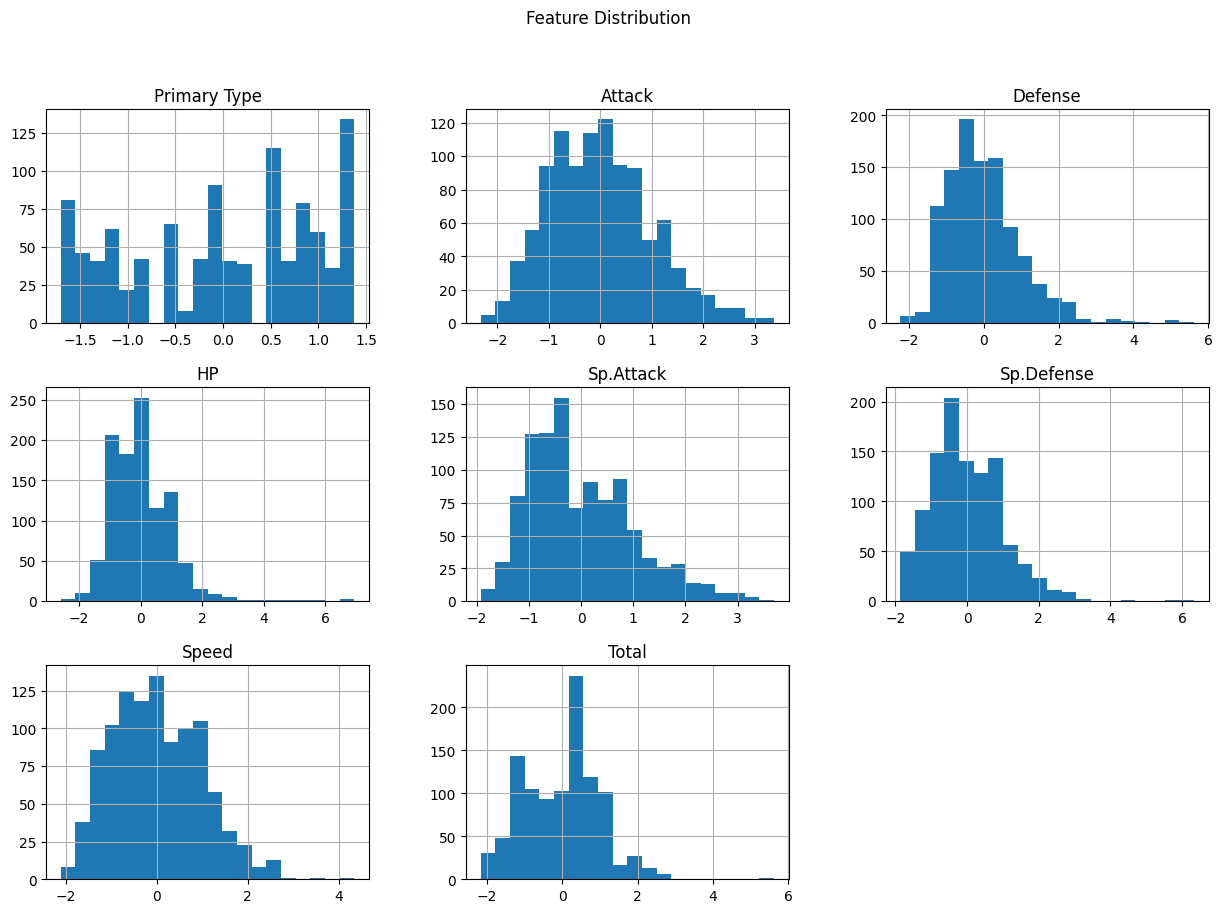


Training with linear kernel...

Best parameters for linear: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Kernel: linear
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       188
           1       0.73      0.38      0.50        21

    accuracy                           0.92       209
   macro avg       0.83      0.68      0.73       209
weighted avg       0.91      0.92      0.91       209

--------------------------------------------------


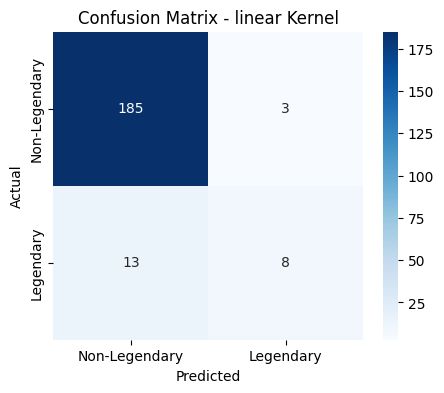


Training with poly kernel...

Best parameters for poly: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
Kernel: poly
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       188
           1       0.80      0.38      0.52        21

    accuracy                           0.93       209
   macro avg       0.87      0.69      0.74       209
weighted avg       0.92      0.93      0.92       209

--------------------------------------------------


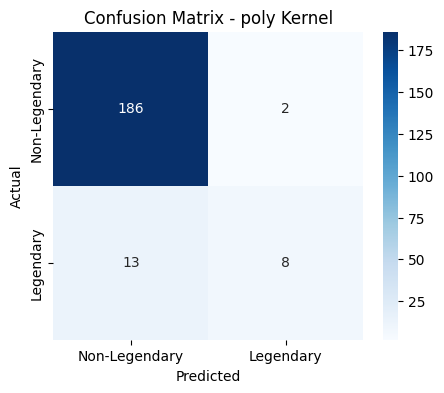


Training with rbf kernel...

Best parameters for rbf: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Kernel: rbf
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       188
           1       0.56      0.48      0.51        21

    accuracy                           0.91       209
   macro avg       0.75      0.72      0.73       209
weighted avg       0.90      0.91      0.91       209

--------------------------------------------------


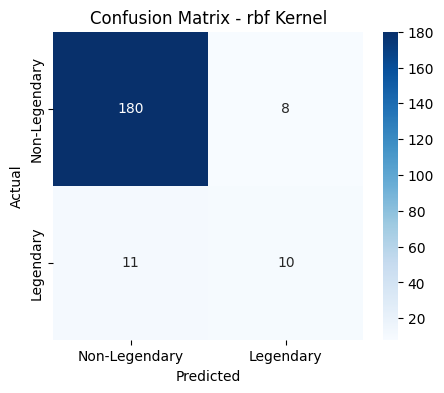


Training with sigmoid kernel...

Best parameters for sigmoid: {'C': 1, 'gamma': 'scale', 'kernel': 'sigmoid'}
Kernel: sigmoid
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       188
           1       0.53      0.38      0.44        21

    accuracy                           0.90       209
   macro avg       0.73      0.67      0.70       209
weighted avg       0.89      0.90      0.90       209

--------------------------------------------------


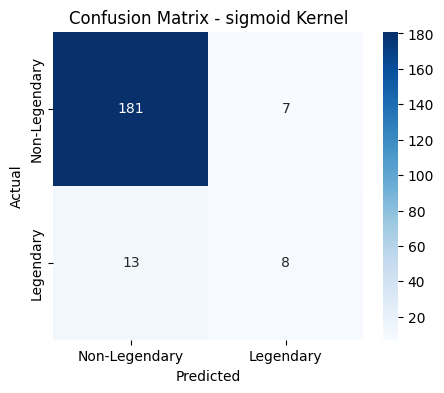

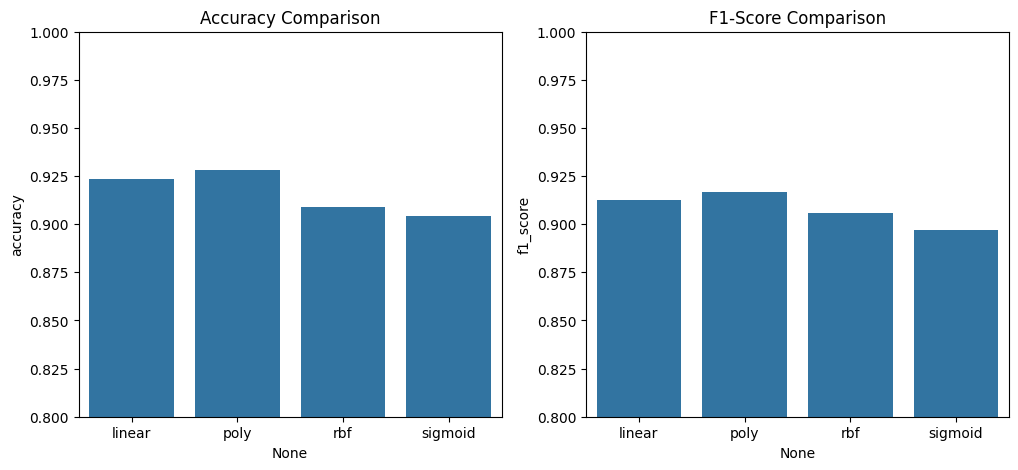

In [4]:
# Approach 1 - GridSearchCV for selecting Best Hyperparameters

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.decomposition import PCA
from imblearn.combine import SMOTEENN
from collections import Counter

df = pd.read_csv("pokemon_dataset.csv")
print(df.info())
print(df.isnull().sum())
print(df.describe())

df.drop(columns=["Name", "Name2", "Secondary type"], errors="ignore", inplace=True)
le = LabelEncoder()
df["Primary Type"] = le.fit_transform(df["Primary Type"])
df["Legendary"] = df["Legendary"].notna().astype(int)

X = df.drop(columns=["Legendary"])
Y = df["Legendary"]

scaler = StandardScaler()
Xscaled = scaler.fit_transform(X)

Xdf = pd.DataFrame(Xscaled, columns=X.columns)

Xdf.hist(bins=20, figsize=(15, 10))
plt.suptitle("Feature Distribution")
plt.show()

pca = PCA(n_components=2)
Xpca = pca.fit_transform(Xscaled)

Xtrain, Xtest, Ytrain, Ytest = train_test_split(Xpca, Y, test_size=0.2, random_state=42, stratify=Y)

kernels = ["linear", "poly", "rbf", "sigmoid"]
results = {}

params = {
    "C": [0.1, 1, 10],
    "gamma": ["scale", "auto"],
    "kernel": None
}

for kernel in kernels:
    print(f"\nTraining with {kernel} kernel...\n")
    params["kernel"] = [kernel]

    grid = GridSearchCV(SVC(), params, cv=5, scoring="accuracy", n_jobs=-1)
    grid.fit(Xtrain, Ytrain)

    best = grid.best_estimator_
    bestparams = grid.best_params_
    print(f"Best parameters for {kernel}: {bestparams}")

    Ypred = best.predict(Xtest)

    results[kernel] = {
        "accuracy": accuracy_score(Ytest, Ypred),
        "f1_score": f1_score(Ytest, Ypred, average="weighted"),
        "bestparams": bestparams
    }

    print(f"Kernel: {kernel}")
    print(classification_report(Ytest, Ypred))
    print("-" * 50)

    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(Ytest, Ypred), annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Legendary", "Legendary"], yticklabels=["Non-Legendary", "Legendary"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {kernel} Kernel")
    plt.show()

result = pd.DataFrame(results).T
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(x=result.index, y=result["accuracy"], ax=axes[0])
axes[0].set_title("Accuracy Comparison")
axes[0].set_ylim(0.8, 1.0)

sns.barplot(x=result.index, y=result["f1_score"], ax=axes[1])
axes[1].set_title("F1-Score Comparison")
axes[1].set_ylim(0.8, 1.0)

plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            1045 non-null   object
 1   Name2           175 non-null    object
 2   Primary Type    1045 non-null   object
 3   Secondary type  553 non-null    object
 4   Attack          1045 non-null   int64 
 5   Defense         1045 non-null   int64 
 6   HP              1045 non-null   int64 
 7   Sp.Attack       1045 non-null   int64 
 8   Sp.Defense      1045 non-null   int64 
 9   Speed           1045 non-null   int64 
 10  Total           1045 non-null   int64 
 11  Legendary       105 non-null    object
dtypes: int64(7), object(5)
memory usage: 98.1+ KB
None
Name                0
Name2             870
Primary Type        0
Secondary type    492
Attack              0
Defense             0
HP                  0
Sp.Attack           0
Sp.Defense          0
Speed               0
T

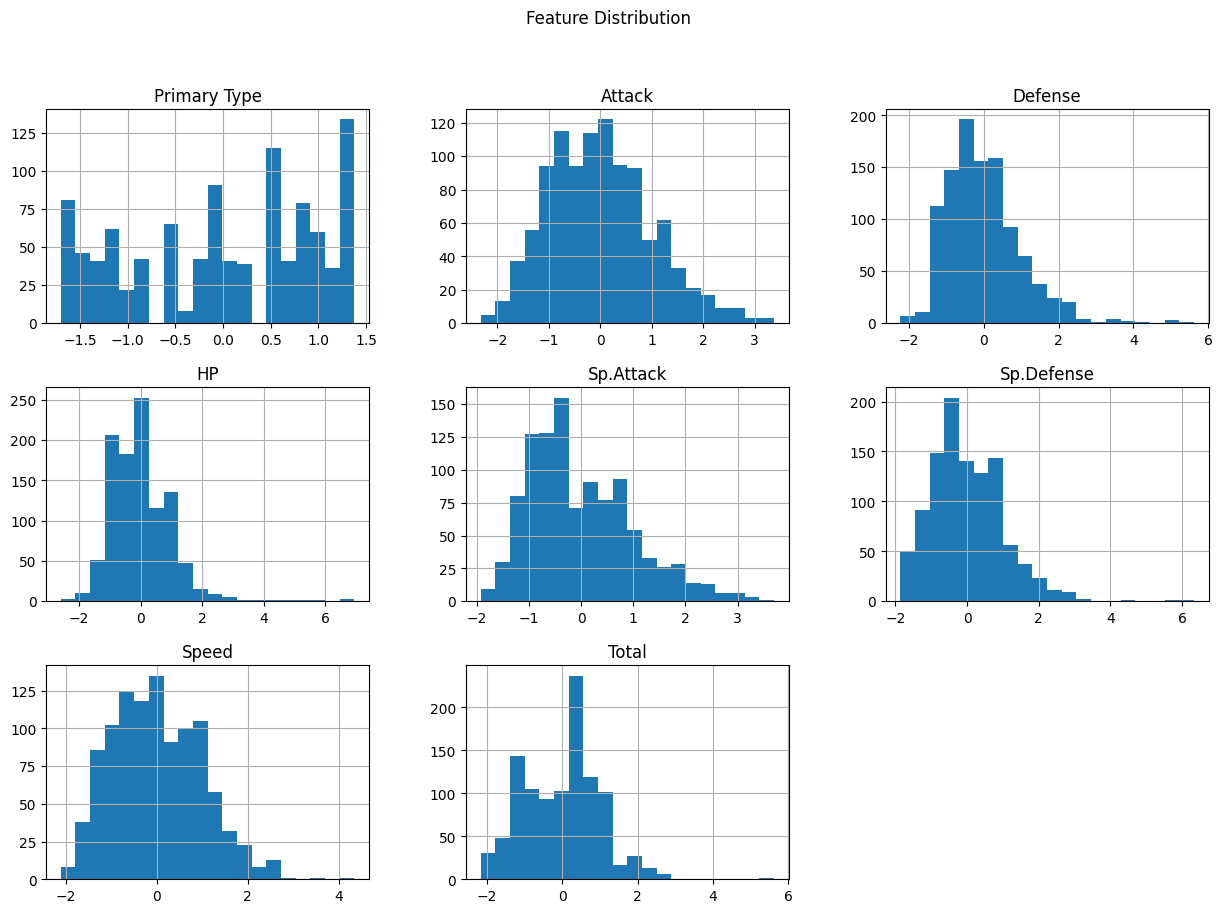


Training with linear kernel

Best parameters for linear: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Kernel: linear
              precision    recall  f1-score   support

           0       0.99      0.94      0.96       188
           1       0.63      0.90      0.75        21

    accuracy                           0.94       209
   macro avg       0.81      0.92      0.85       209
weighted avg       0.95      0.94      0.94       209

--------------------------------------------------


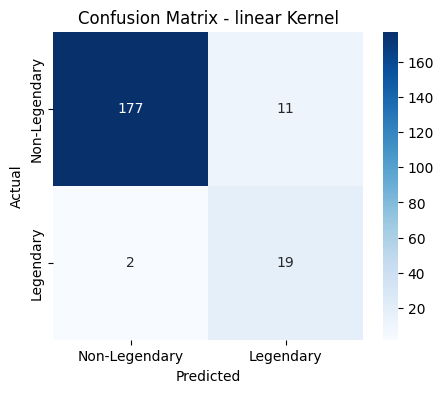


Training with poly kernel

Best parameters for poly: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
Kernel: poly
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       188
           1       0.64      0.86      0.73        21

    accuracy                           0.94       209
   macro avg       0.81      0.90      0.85       209
weighted avg       0.95      0.94      0.94       209

--------------------------------------------------


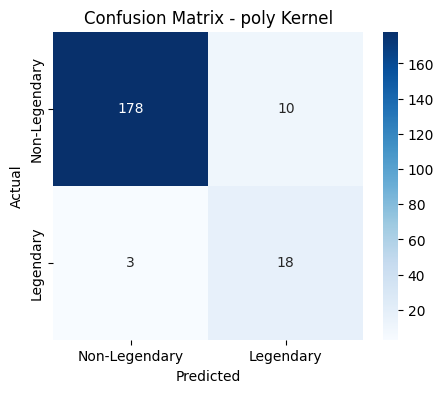


Training with rbf kernel

Best parameters for rbf: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Kernel: rbf
              precision    recall  f1-score   support

           0       0.98      0.93      0.96       188
           1       0.58      0.86      0.69        21

    accuracy                           0.92       209
   macro avg       0.78      0.89      0.82       209
weighted avg       0.94      0.92      0.93       209

--------------------------------------------------


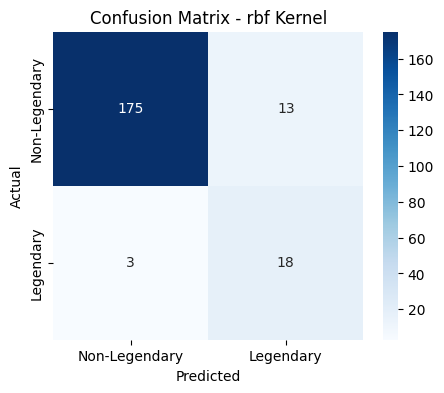


Training with sigmoid kernel

Best parameters for sigmoid: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
Kernel: sigmoid
              precision    recall  f1-score   support

           0       0.96      0.73      0.83       188
           1       0.24      0.76      0.36        21

    accuracy                           0.73       209
   macro avg       0.60      0.75      0.60       209
weighted avg       0.89      0.73      0.78       209

--------------------------------------------------


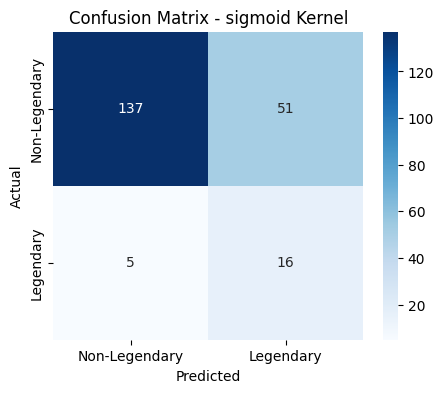

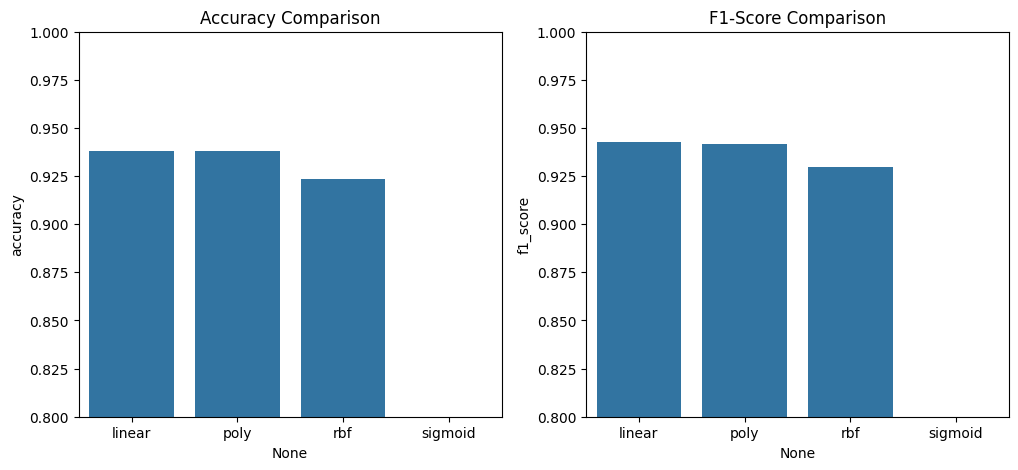

In [5]:
# Apprach 2 - With SMOTEENN for Balancing and GridSearchCV for selecting best Hyperparameters

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.decomposition import PCA
from imblearn.combine import SMOTEENN
from collections import Counter

df = pd.read_csv("pokemon_dataset.csv")
print(df.info())
print(df.isnull().sum())
print(df.describe())

df.drop(columns=["Name", "Name2", "Secondary type"], errors="ignore", inplace=True)
le = LabelEncoder()
df["Primary Type"] = le.fit_transform(df["Primary Type"])
df["Legendary"] = df["Legendary"].notna().astype(int)

X = df.drop(columns=["Legendary"])
Y = df["Legendary"]

scaler = StandardScaler()
Xscaled = scaler.fit_transform(X)

Xdf = pd.DataFrame(Xscaled, columns=X.columns)

Xdf.hist(bins=20, figsize=(15, 10))
plt.suptitle("Feature Distribution")
plt.show()

pca = PCA(n_components=2)
Xpca = pca.fit_transform(Xscaled)

Xtrain, Xtest, Ytrain, Ytest = train_test_split(Xpca, Y, test_size=0.2, random_state=42, stratify=Y)
smote = SMOTEENN(random_state=42)
Xtrain, Ytrain = smote.fit_resample(Xtrain, Ytrain)

kernels = ["linear", "poly", "rbf", "sigmoid"]
results = {}

params = {
    "C": [0.1, 1, 10],
    "gamma": ["scale", "auto"],
    "kernel": None
}

for kernel in kernels:
    print(f"\nTraining with {kernel} kernel\n")
    params["kernel"] = [kernel]

    grid = GridSearchCV(SVC(), params, cv=5, scoring="accuracy", n_jobs=-1)
    grid.fit(Xtrain, Ytrain)

    best = grid.best_estimator_
    bestparams = grid.best_params_
    print(f"Best parameters for {kernel}: {bestparams}")

    Ypred = best.predict(Xtest)

    results[kernel] = {
        "accuracy": accuracy_score(Ytest, Ypred),
        "f1_score": f1_score(Ytest, Ypred, average="weighted"),
        "bestparams": bestparams
    }

    print(f"Kernel: {kernel}")
    print(classification_report(Ytest, Ypred))
    print("-" * 50)

    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(Ytest, Ypred), annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Legendary", "Legendary"], yticklabels=["Non-Legendary", "Legendary"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {kernel} Kernel")
    plt.show()

result = pd.DataFrame(results).T
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(x=result.index, y=result["accuracy"], ax=axes[0])
axes[0].set_title("Accuracy Comparison")
axes[0].set_ylim(0.8, 1.0)

sns.barplot(x=result.index, y=result["f1_score"], ax=axes[1])
axes[1].set_title("F1-Score Comparison")
axes[1].set_ylim(0.8, 1.0)

plt.show()

Accuracy: 0.937799043062201
F1 Score: 0.9416519865813833

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       188
           1       0.64      0.86      0.73        21

    accuracy                           0.94       209
   macro avg       0.81      0.90      0.85       209
weighted avg       0.95      0.94      0.94       209



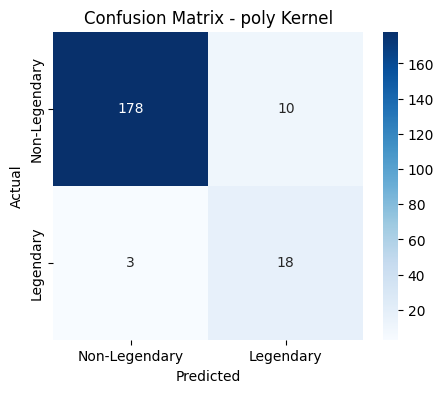

In [6]:
# Best model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from imblearn.combine import SMOTEENN

df = pd.read_csv("pokemon_dataset.csv")
df.drop(columns=["Name", "Name2", "Secondary type"], errors="ignore", inplace=True)

le = LabelEncoder()
df["Primary Type"] = le.fit_transform(df["Primary Type"])
df["Legendary"] = df["Legendary"].notna().astype(int)

X = df.drop(columns=["Legendary"])
Y = df["Legendary"]

scaler = StandardScaler()
Xscaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
Xpca = pca.fit_transform(Xscaled)

Xtrain, Xtest, Ytrain, Ytest = train_test_split(Xpca, Y, test_size=0.2, random_state=42, stratify=Y)

smote = SMOTEENN(random_state=42)
Xtrain, Ytrain = smote.fit_resample(Xtrain, Ytrain)

best_kernel = "poly" 
best_C = 0.1 
best_gamma = "scale" 

svm_model = SVC(kernel=best_kernel, C=best_C, gamma=best_gamma, random_state=42, class_weight="balanced")
svm_model.fit(Xtrain, Ytrain)
Ypred = svm_model.predict(Xtest)

print(f"Accuracy: {accuracy_score(Ytest, Ypred)}")
print(f"F1 Score: {f1_score(Ytest, Ypred, average='weighted')}")
print("\nClassification Report:")
print(classification_report(Ytest, Ypred))

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(Ytest, Ypred), annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Legendary", "Legendary"], yticklabels=["Non-Legendary", "Legendary"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix - {best_kernel} Kernel")
plt.show()

# My Approach

I started by importing the Pokémon dataset and performed some initial data exploration using basic commands like `df.info()`. This was necessary since I noticed that there were many missing values. It was given that I shouldn't use "Name" and "Name2" and the "Secondary type" had the most missing values. So, I dropped those columns to simplify the dataset and reduce noise. I also noticed that the target variable 'Legendary' had missing values, so I changed it into a binary indicator where 1 represents a legendary Pokémon and 0 represents a non-legendary Pokémon.

For pre-processing, I applied LabelEncoder to encode the categorical variables, particularly changing the 'Primary Type' feature into numeric values. To scale the features and improve model performance, I employed StandardScaler to normalize the features to a standard scale. Scaling is beneficial in making training more efficient as well as avoiding any feature dominating based on scale. I also decided to perform PCA to reduce dimensionality as reducing the features to a lower-dimensional space might improve the model’s ability to generalize by focusing on the most important components.

I used the SMOTEENN approach also to oversample the minority class before training the model because class distribution was skewed (with many more non-legendary Pokémon than legendary ones). I observed that initially without using any balancing technique, SVM was classifying everything as the majority class "Non-Legendary" but after SMOTEENN, it grew much more accurate. I performed GridSearchCV to select the best hyperparameters for the SVM, specifically tuning the regularization parameter (C), the kernel type, and the gamma value. I tried all kinds of kernels ranging from "linear", "poly", "rbf", and "sigmoid", as different kernels are applied for solving different kinds of decision boundaries. I chose these kernels because they offer a good range of options: the linear kernel is optimal when data is linearly separable, but the polynomial and radial basis function kernels allow more scope for non-linear decision boundaries. I would not employ the "sigmoid" kernel because it is less common in practice for this type of classification problem, but it was still worth including for comparison.

After having trained the models, I compared them using accuracy and F1 score, as well as confusion matrices to check visually how well the classifier did. I also plotted decision boundaries to visually assess how well the model separated the classes. I found that applying PCA improved model performance, likely because it reduced noise and focused the model on the most significant features. Through these steps, I was able to tune the SVM classifier for the best performance using GridSearchCV and obtain a better-performing model.